# BIG MART SALES PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
train=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\bigdatamart_Train.csv')
test=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\bigdatamart_Test.csv')

In [3]:
train=train.copy()
test = test.copy()

In [4]:
train.head()
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [10]:
# Joining the train and test datas


train['d'] = 'train'      
test['d'] = 'test'
#test['Item_Outlet_Sales'] = np.nan


In [11]:
data = pd.concat([train,test],0,sort= False)

C:\Users\sandeep\AppData\Local\Temp\ipykernel_8344\2299317569.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([train,test],0,sort= False)


In [12]:
print(data.shape)

(14204, 13)


In [ ]:
data.head()

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [136]:
for i in data.select_dtypes(include = 'object'):
    print(data[i].value_counts())

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

In [137]:
# Number of unique variable in each columns  
for i,j in enumerate(data.columns):
    print(data.columns[i],len(data[j].unique()))
       

Item_Identifier 1559
Item_Weight 416
Item_Fat_Content 5
Item_Visibility 13006
Item_Type 16
Item_MRP 8052
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3494


In [138]:
# checking if there are any 0 values  in the columns

for i in (data.columns):
    print(i,data[data[i] == 0][i].count())

Item_Identifier 0
Item_Weight 0
Item_Fat_Content 0
Item_Visibility 879
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 0
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0


In [13]:
# Value counts of the target variable

data['Outlet_Location_Type_Tier 1'].value_counts().sort_index()

KeyError: 'Outlet_Location_Type_Tier 1'

# data visualisation

In [ ]:

#univaritate data analysis

plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

# checking the columns of the train set

print(train.columns)

train.dtypes

In [ ]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()


In [ ]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

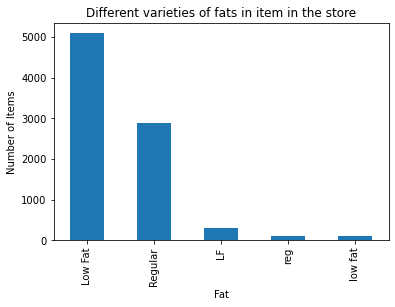

In [14]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [15]:
# checking the different items in Item Type

train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

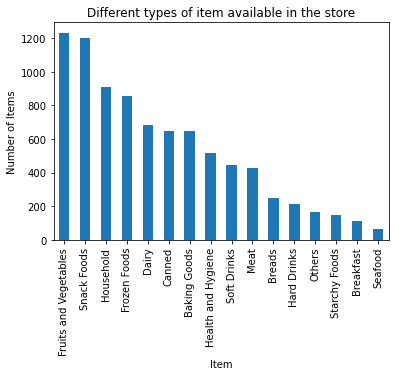

In [16]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


In [17]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

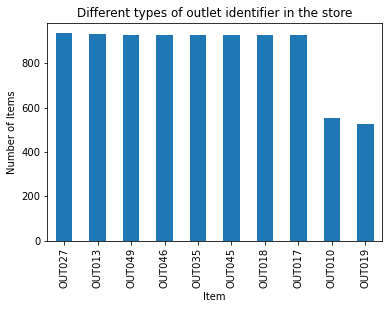

In [18]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


In [19]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

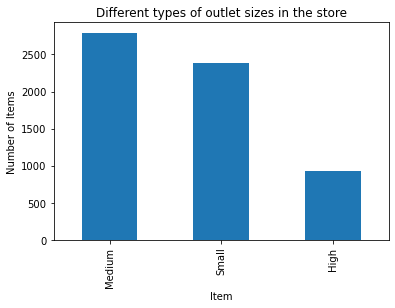

In [20]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [21]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

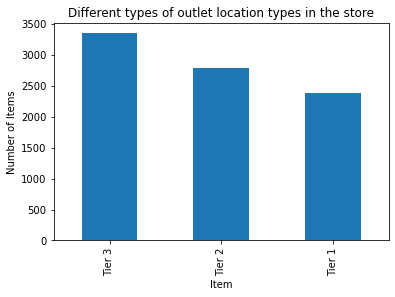

In [22]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [23]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

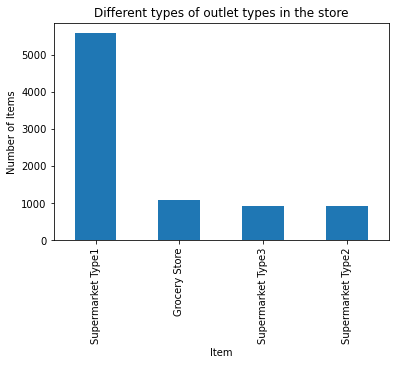

In [24]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content'>

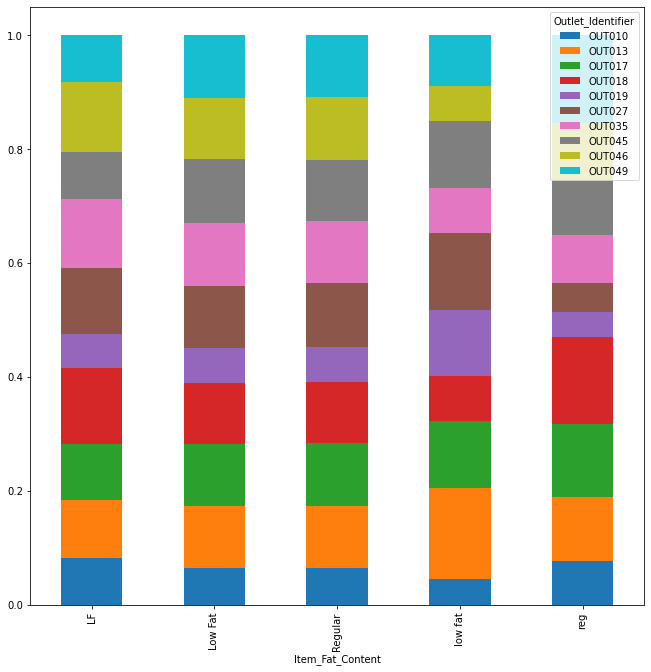

In [25]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))


<AxesSubplot:xlabel='Item_Type'>

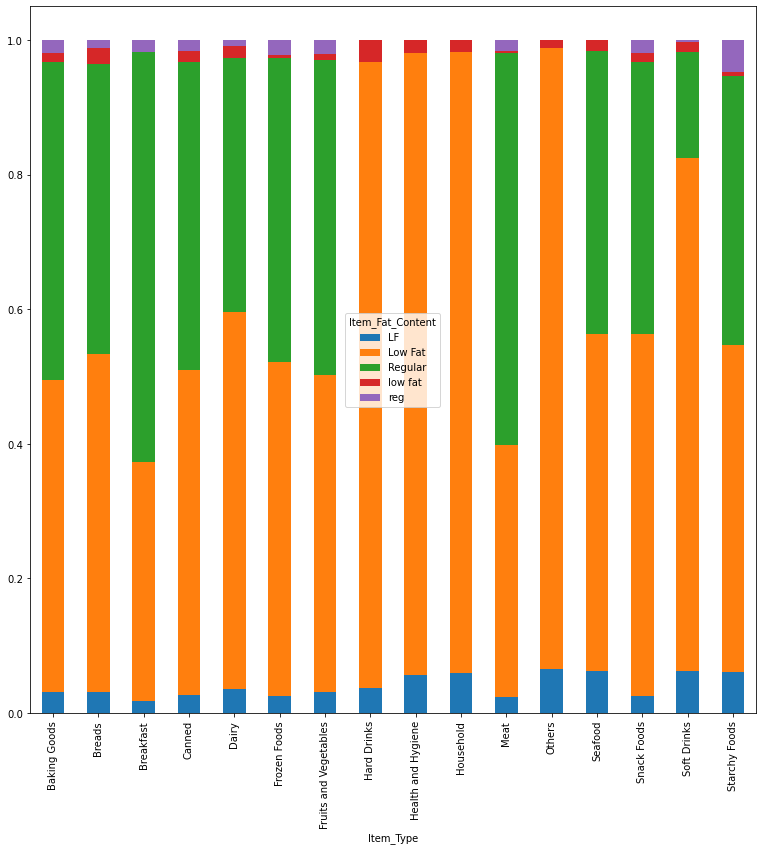

In [26]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))


In [27]:
# value counts for the object type columns

for i in data.select_dtypes(include = 'object'):
    print(data[i].value_counts())

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

In [28]:
col = data.select_dtypes(include = 'object').columns[:-1]

In [29]:
col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [30]:
# getting dummies fot categorical columns

data_dummy = pd.get_dummies(data[col],drop_first = True)

In [31]:
data.drop(col,axis = 1,inplace = True)

In [32]:
final=pd.concat([data,data_dummy],1)

C:\Users\sandeep\AppData\Local\Temp\ipykernel_8344\4011309695.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  final=pd.concat([data,data_dummy],1)


In [33]:
final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,d,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,train,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,train,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,train,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,train,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,train,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [53]:
# splitting again ton train test
train = final[final['d'] == 'train']
test_data = final[final['d'] == 'test']

In [54]:
train.drop('d',1,inplace = True)

C:\Users\sandeep\AppData\Local\Temp\ipykernel_8344\2969736064.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('d',1,inplace = True)
C:\Users\sandeep\AppData\Local\Temp\ipykernel_8344\2969736064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('d',1,inplace = True)


In [55]:
test_data.drop('d',1,inplace = True)

C:\Users\sandeep\AppData\Local\Temp\ipykernel_8344\208031841.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_data.drop('d',1,inplace = True)
C:\Users\sandeep\AppData\Local\Temp\ipykernel_8344\208031841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('d',1,inplace = True)


# data pre processing

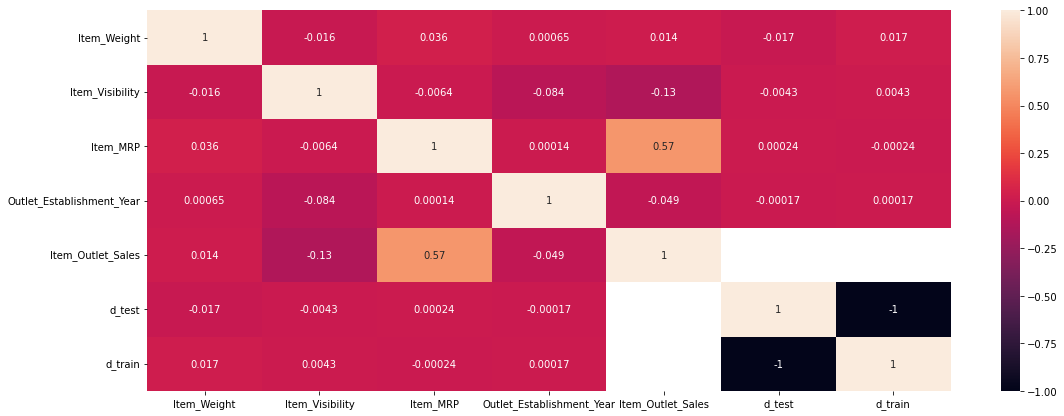

In [56]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(data.corr(),annot=True)
plt.show()

# # label encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

# one hot encoding

data = pd.get_dummies(data)
print(data.shape)

(14204, 7)


# # splitting the data into dependent and independent variables


In [58]:
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales


In [59]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(9942, 6)
(9942,)
(4262, 6)
(4262,)


In [61]:
x.shape

(14204, 6)

# Modelling

# Feature Engineering

In [182]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                nan
Time:                        15:54:52   Log-Likelihood:                    nan
No. Observations:               14204   AIC:                               nan
Df Residuals:                   14196   BIC:                               nan
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                                nan        nan        nan        nan         nan         nan
Item_Weight                          nan        nan        nan        nan         nan         nan
Item_Visibility                      nan        nan        nan        nan         nan         nan
Item_MRP                             nan        nan        nan        nan         nan         nan
Outlet_Establishment_Year            nan        nan        nan        nan         nan         nan
Outlet_Years                         nan        nan        nan        nan         nan         nan
Outlet_Type_Grocery Store            nan        nan        nan        nan         nan         nan
Outlet_Type_Supermarket Type1        nan        nan        nan        nan         nan         nan
Outlet_Type_Supermarket Type2        nan        nan        nan        nan         nan         nan
Outlet_Type_Supermarket Type3        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     5.17e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

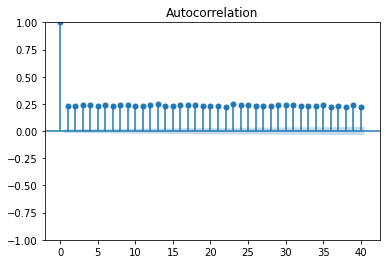

In [54]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

# assumption-2

In [55]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=9505.03497886163, pvalue=0.0)


<AxesSubplot:ylabel='Density'>

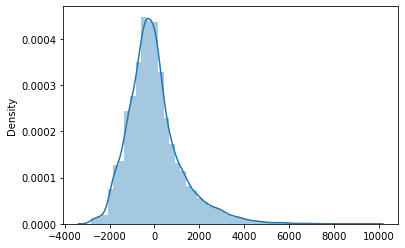

In [56]:
import seaborn as sns

sns.distplot(lin_reg.resid)

# assumption-3

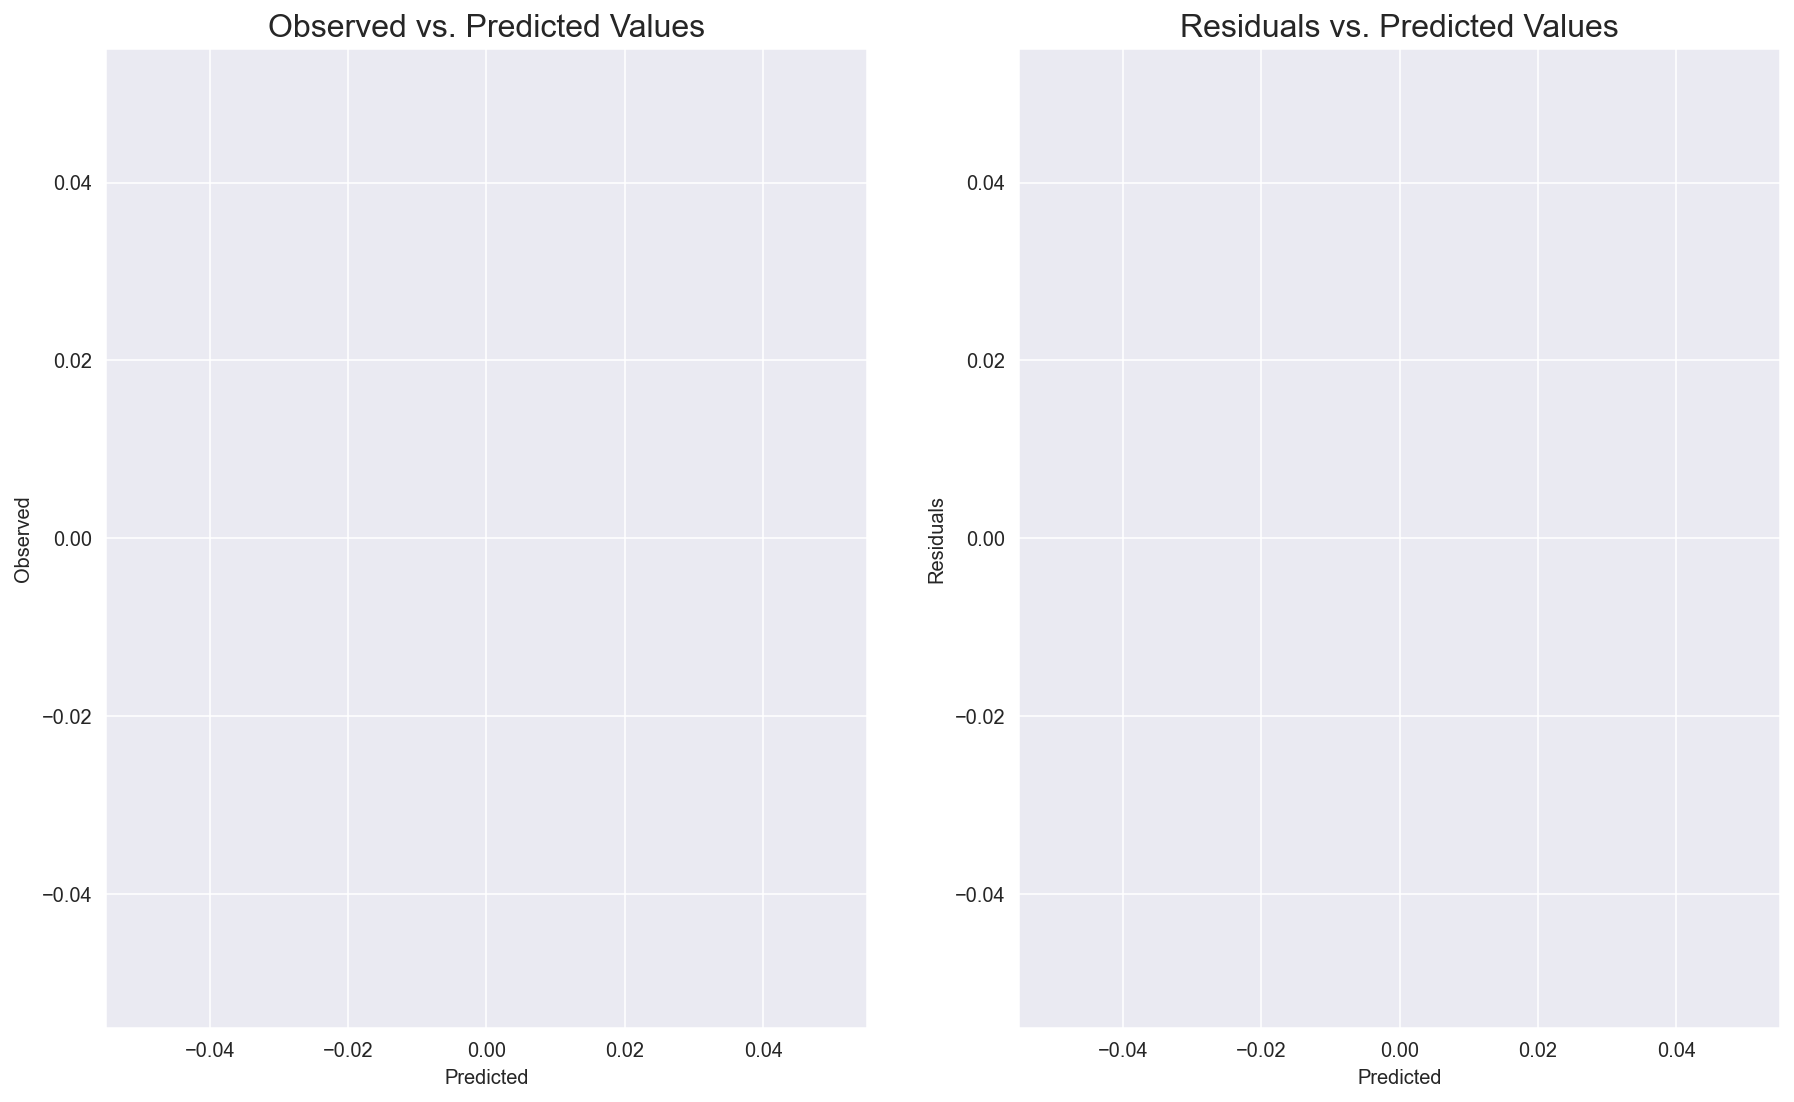

In [198]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

# RAIN BOW TEST

In [199]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.4)

(nan, nan)

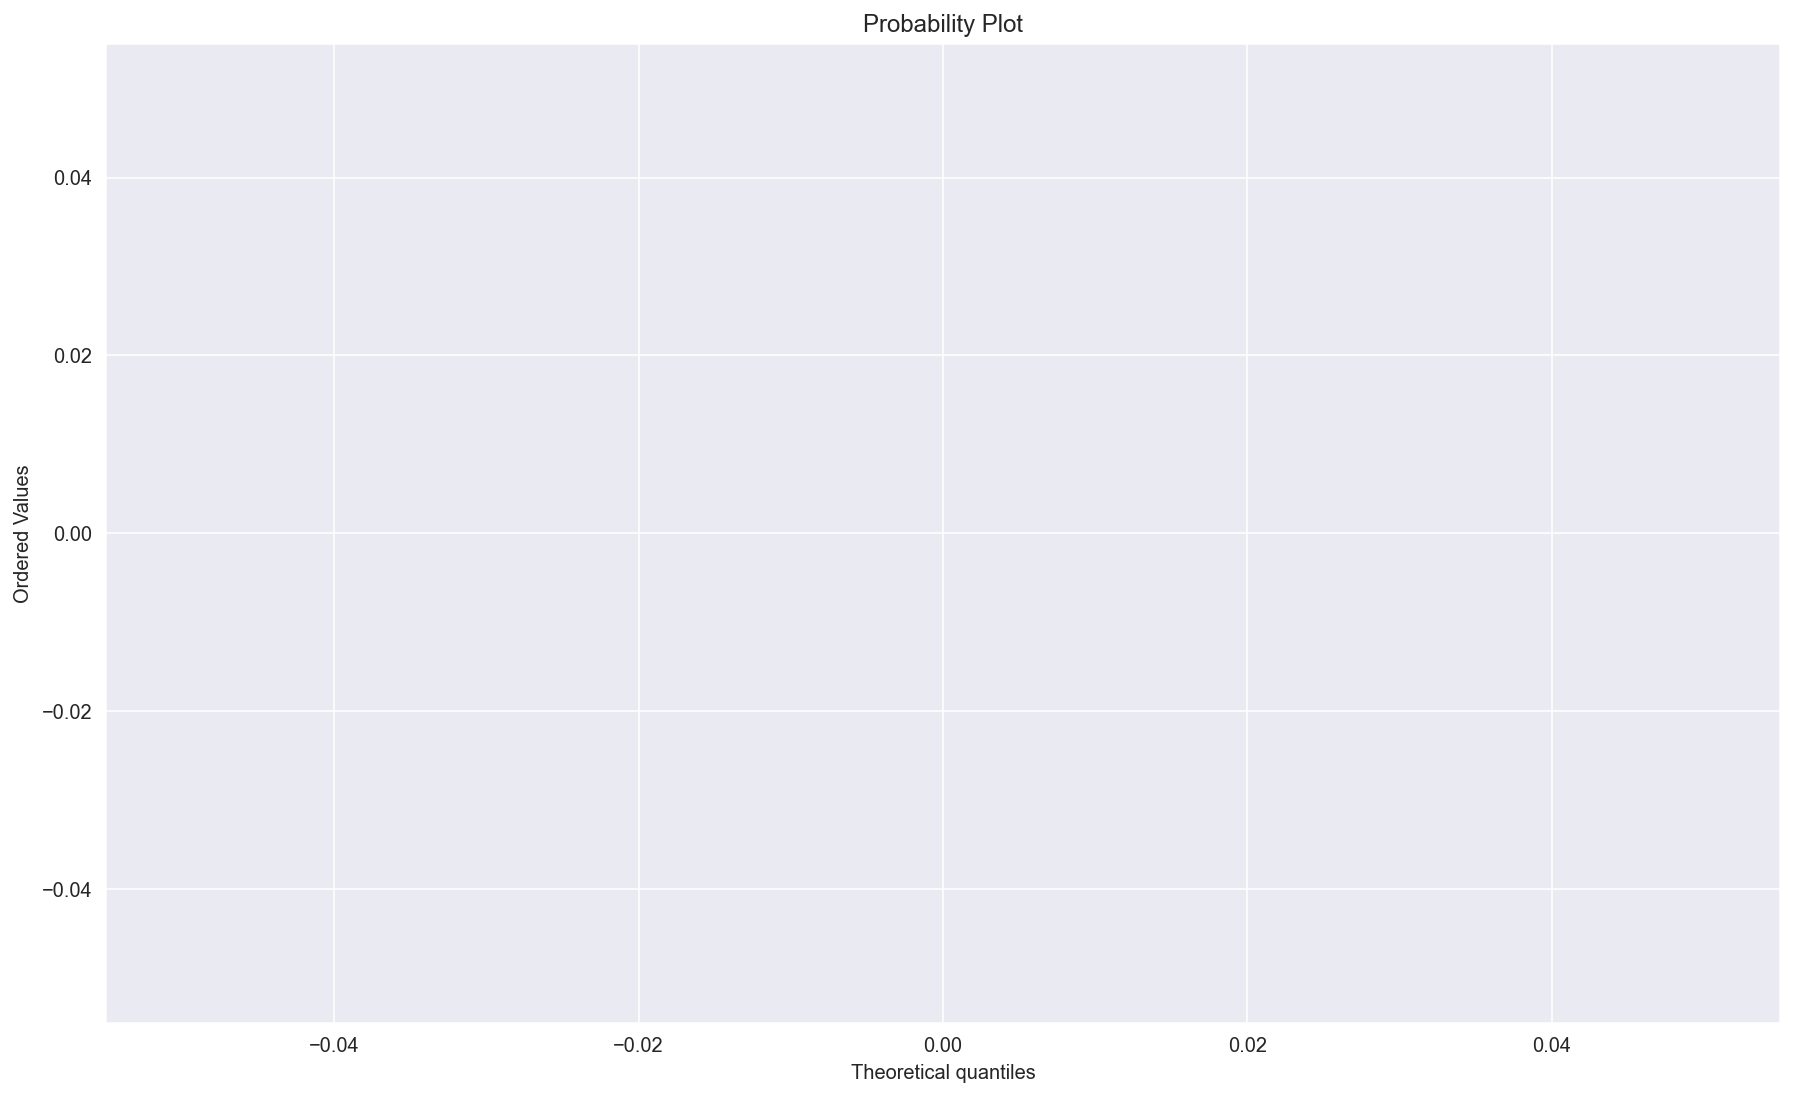

In [200]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [201]:
lin_reg.resid.mean()

nan

In [202]:
#ASSUMPTION 5 - NO MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns)

,vif
Item_Weight,1.001274
Item_Visibility,1.089698
Item_MRP,1.001128
Outlet_Establishment_Year,inf
Outlet_Years,inf
Outlet_Type_Grocery Store,inf
Outlet_Type_Supermarket Type1,inf
Outlet_Type_Supermarket Type2,inf
Outlet_Type_Supermarket Type3,inf


In [ ]:
sns.heatmap(final.corr(), annot=True)

In [ ]:
Function to build statsmodel and ML models
def statsmodel(x,y):
    x_constant = sm.add_constant(x)
    reg_model = sm.OLS(y,x_constant).fit()
    return reg_model.summary()

def ML_model(lr,x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    lr.fit(X_train,y_train)
    print('Train score -',lr.score(X_train,y_train))
    print('test score - ',lr.score(X_test,y_test))

# GridSearchCV to find optimal max_dept wi​th decisiontreeregression

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeRegressor( random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds)

tree.fit(be_x,be_y)

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 16, 5),
    'min_samples_leaf': range(50, 151, 50),
    'min_samples_split': range(50, 151, 50),
    'criterion': ["mse", "mae"]
}


# Instantiate the grid search model
dtree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = 5, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [2,5,8,10,15,18,20],
    'criterion':['mse','mae'],
    'max_depth':[3,5,7,9,11,13,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,3,5]}

rf = RandomForestRegressor(n_estimators=10)
rf.fit(be_x,be_y)

In [ ]:
ML_model(rf,be_x,be_y)

In [ ]:
Random forest regressor with grid search
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["mse", "mae"]
}


# Instantiate the grid search model
rf_gs = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_gs, param_grid = param_grid, 
                          cv = 5, verbose = 1)

# Fit the grid search to the data
grid_search.fit(be_x,be_y)

In [ ]:
grid_search.best_estimator_

In [ ]:
param_grid = {'n_estimators':10,
             'max_depth':10,
             'criterion':'mse',
             'min_samples_leaf':50}

rf_gs = RandomForestRegressor(n_estimators = 10,max_depth= 10,min_weight_fraction_leaf=0.0,
                              max_features='auto',min_impurity_decrease=0.0,verbose=0
                              ,criterion ='mse', min_samples_leaf= 50,min_samples_split=100)
ML_model(rf_gs,be_x,be_y)

# bagging

In [ ]:
%matplotlib inline
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostRegressor
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(0)

In [ ]:
X_train_be,X_test_be,y_train_be,y_test_be = train_test_split(be_x,be_y,test_size = 0.3,random_state = 0)



clf1 = DecisionTreeRegressor(criterion='mse')
clf2 = KNeighborsRegressor(n_neighbors=3)    
clf3 = Ridge(alpha=3)
clf4 = Lasso(alpha=0.001)    
clf5 = LinearRegression()


bagging1 = BaggingRegressor(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingRegressor(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingRegressor(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingRegressor(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging5 = BaggingRegressor(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)


label = ['Decision Tree','bagging tree','knn','bagging knn','Ridge','bagging ridge',
         'Lasso','bagging lasso','Linear','bagging linear']
clf_list = [clf1,bagging1,clf2,bagging2,clf3,bagging3,clf4,bagging4,clf5,bagging5]
grid = itertools.product([0,1],repeat=5)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train_be,y_train_be, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    

In [ ]:
#plot learning curves
# X = fin.drop('Order Priority',1)
# y = fin['Order Priority']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging4, print_model=False, style='ggplot')
plt.show()

# Gradient booster

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor(n_estimators=50,
                                      random_state=3)
print(boost_reg.fit(X_train, y_train))
print(boost_reg.score(X_test, y_test))

# submission

In [ ]:
pd.DataFrame(submitting_df).to_csv("F:/mysubmissionbigmart.csv",index=False)

# save the model

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))